In [60]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns


In [61]:
#read the data
df= pd.read_csv("E:\insideAIML\ML\cell_samples.csv") 


In [62]:
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [64]:
x=df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BlandChrom', 'NormNucl', 'Mit']]


In [65]:
y=df["Class"]

In [66]:
set(y)

{2, 4}

In [67]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Clump        699 non-null    int64
 1   UnifSize     699 non-null    int64
 2   UnifShape    699 non-null    int64
 3   MargAdh      699 non-null    int64
 4   SingEpiSize  699 non-null    int64
 5   BlandChrom   699 non-null    int64
 6   NormNucl     699 non-null    int64
 7   Mit          699 non-null    int64
dtypes: int64(8)
memory usage: 43.8 KB


In [68]:
from sklearn.feature_selection import mutual_info_classif

In [69]:
MIC =mutual_info_classif(x , y )

In [70]:
MIC

array([0.2871487 , 0.38172706, 0.41378577, 0.27205155, 0.35266937,
       0.3541972 , 0.27564233, 0.15724517])

In [72]:
# convert it inyo series form 

MIC_ser =pd.Series(MIC)

In [73]:
MIC_ser

0    0.287149
1    0.381727
2    0.413786
3    0.272052
4    0.352669
5    0.354197
6    0.275642
7    0.157245
dtype: float64

In [74]:
x.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BlandChrom', 'NormNucl', 'Mit'],
      dtype='object')

In [75]:
imp_col =x.columns

In [76]:
MIC_ser.index

RangeIndex(start=0, stop=8, step=1)

In [77]:
MIC_ser.values

array([0.2871487 , 0.38172706, 0.41378577, 0.27205155, 0.35266937,
       0.3541972 , 0.27564233, 0.15724517])

In [80]:
MIC_ser.index = imp_col

In [81]:
MIC_ser

Clump          0.287149
UnifSize       0.381727
UnifShape      0.413786
MargAdh        0.272052
SingEpiSize    0.352669
BlandChrom     0.354197
NormNucl       0.275642
Mit            0.157245
dtype: float64

In [82]:
MIC_ser.sort_values(ascending=False)

UnifShape      0.413786
UnifSize       0.381727
BlandChrom     0.354197
SingEpiSize    0.352669
Clump          0.287149
NormNucl       0.275642
MargAdh        0.272052
Mit            0.157245
dtype: float64

In [134]:
sign_col = [] 

for i in x.columns :
    if MIC_ser[i] > 0.3 : 
        sign_col.append(i)

In [84]:
sign_col

['UnifSize', 'UnifShape', 'SingEpiSize', 'BlandChrom']

In [135]:
x_new =df[sign_col]

In [136]:
x_new

,UnifSize,UnifShape,SingEpiSize,BlandChrom
0,1,1,2,3
1,4,4,7,3
2,1,1,2,3
3,8,8,3,3
4,1,1,2,3
...,...,...,...,...
694,1,1,3,1
695,1,1,2,1
696,10,10,7,8
697,8,6,3,10


In [158]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.2,random_state=50)


In [159]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.tree import  DecisionTreeClassifier 
from sklearn.naive_bayes import CategoricalNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 


In [160]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy_score (y_pred,y_test)

0.9642857142857143

In [161]:
lr = SVC()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy_score (y_pred,y_test)

0.9714285714285714

In [162]:
lr = DecisionTreeClassifier ()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy_score (y_pred,y_test)

0.9428571428571428

In [163]:
lr = CategoricalNB()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy_score (y_pred,y_test)

0.9785714285714285

In [164]:
lr = RandomForestClassifier ()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy_score (y_pred,y_test)

0.9714285714285714

In [167]:
colorset=np.array([' ',' ', 'red',' ','black'])

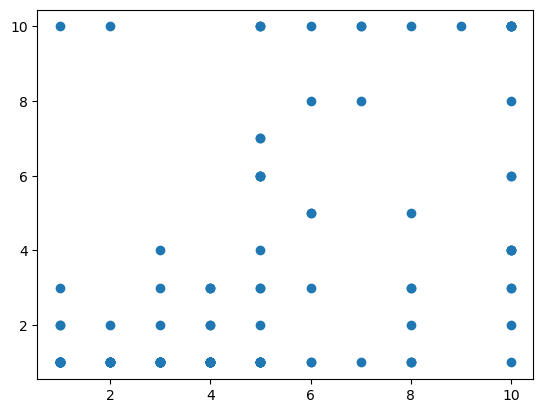

In [168]:
plt.scatter(x_test[ : ,0] , x_test[ : ,3])

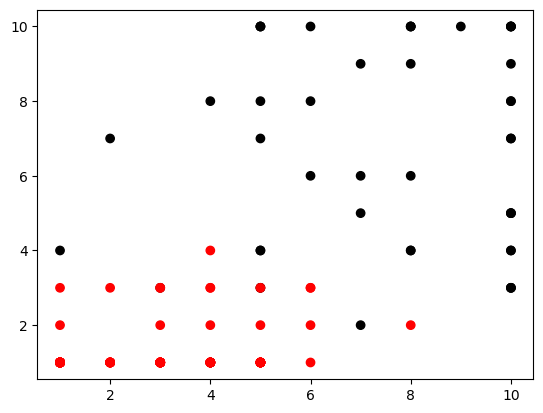

In [170]:
plt.scatter(x_test[ : ,0] , x_test[ : ,1] , c=colorset[y_test])

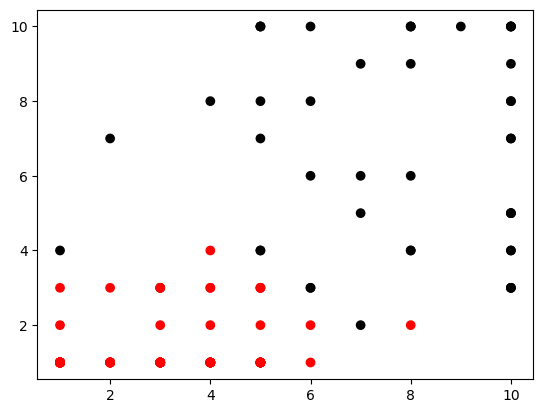

In [171]:
plt.scatter(x_test[ : ,0] , x_test[ : ,1] , c=colorset[y_pred])